# Play with Pytorch
## 变量

In [1]:
import torch 
from torch.autograd import Variable

In [2]:
tensor = torch.FloatTensor([[1,2], [3,4]])
var = Variable(tensor, requires_grad=True)
print(tensor)
print(var)

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


## 计算梯度　　　　　　　

In [3]:
t_out = torch.mean(tensor * tensor) # * means element-wise product in torch
v_out = torch.mean(var * var)

print(t_out)
print(v_out)

tensor(7.5000)
tensor(7.5000, grad_fn=<MeanBackward0>)


In [4]:
v_out.backward(retain_graph=True)
print(var.grad)
print(var.data)
print(var.data.numpy())

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])
tensor([[1., 2.],
        [3., 4.]])
[[1. 2.]
 [3. 4.]]


## 激活函数

/home/huiwen/anaconda3/envs/baselines/lib/python3.6/site-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/home/huiwen/anaconda3/envs/baselines/lib/python3.6/site-packages/torch/nn/functional.py:1374: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


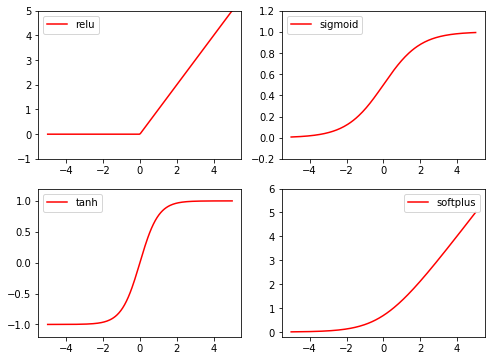

In [5]:
import torch.nn.functional as F

x = torch.linspace(-5, 5., 200)
x = Variable(x)

x_np = x.data.numpy()

y_relu = F.relu(x).data.numpy()
y_sig = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

# plot
import matplotlib.pyplot as plt
plt.figure(1, figsize=(8,6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sig, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

## 回归

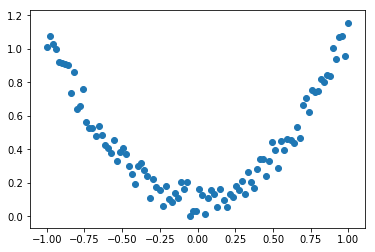

In [6]:
# samples
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()



In [7]:
class Net(torch.nn.Module):
    def __init__(self, n_feat, n_hidden, n_out):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feat, n_hidden)
        self.pred = torch.nn.Linear(n_hidden, n_out)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.pred(x)
        return x
    
net = Net(n_feat=1, n_hidden=10, n_out=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (pred): Linear(in_features=10, out_features=1, bias=True)
)


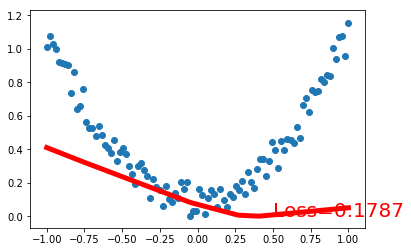

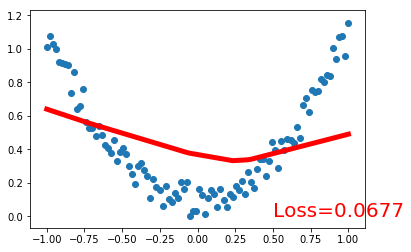

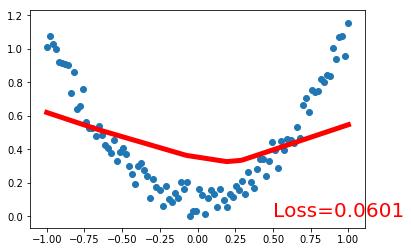

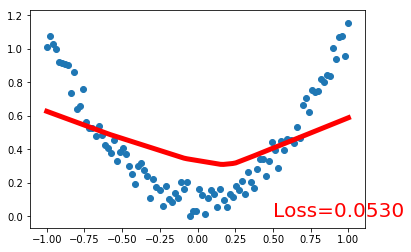

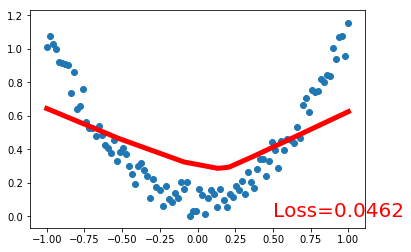

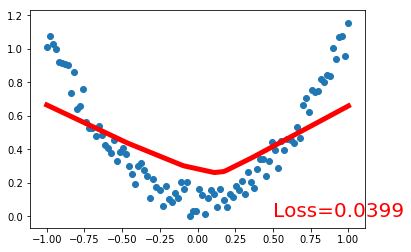

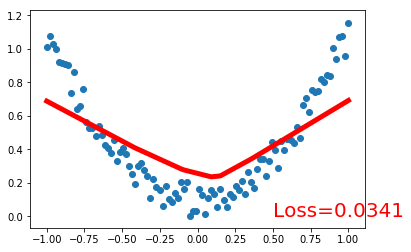

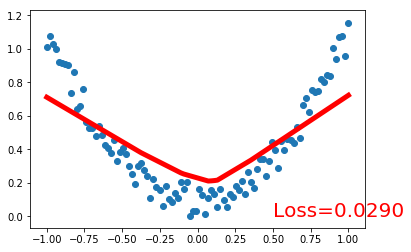

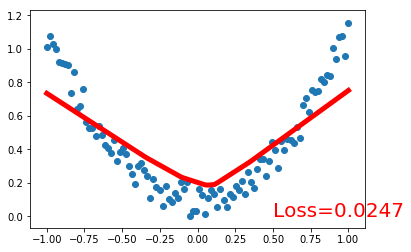

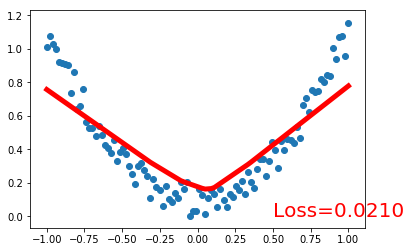

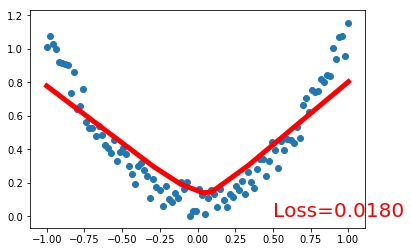

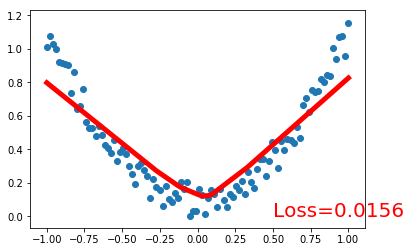

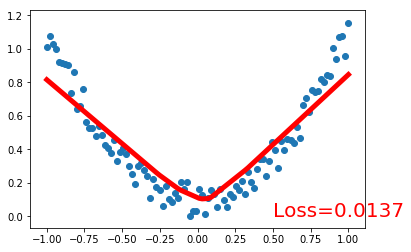

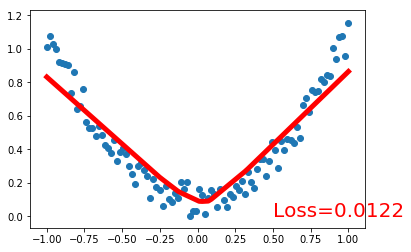

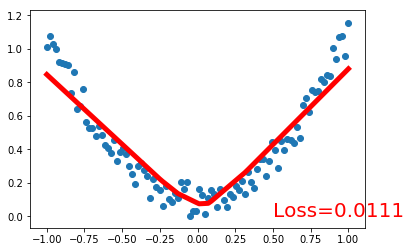

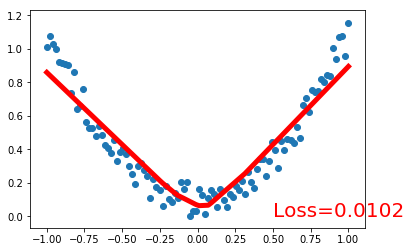

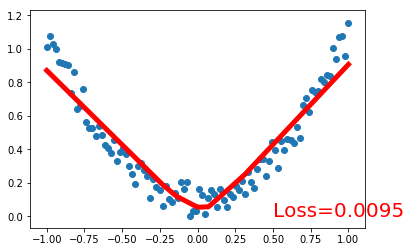

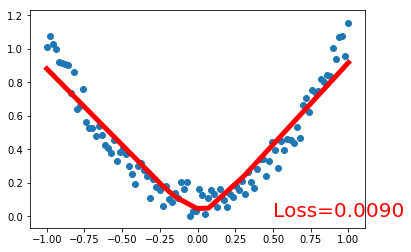

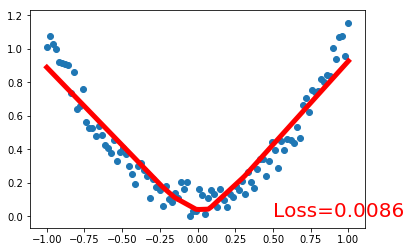

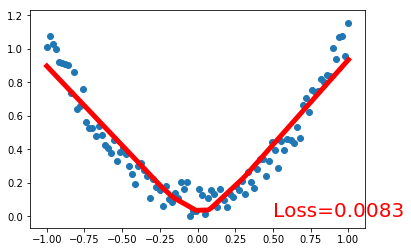

In [8]:
# train the net
optimizer =torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()
plt.ion()   # 画图
plt.show()

for t in range(100):
    pred = net(x)
    loss = loss_func(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), pred.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

## 分类

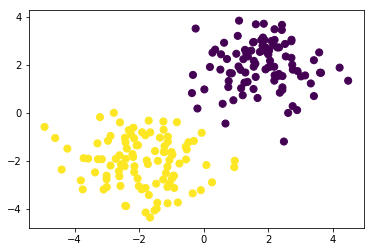

In [9]:
ｄata = torch.ones(100, 2)
x0 = torch.normal(2*data,1) # mean is 2, std is 1
x0.data.numpy()
y0 = torch.zeros(100)

x1 = torch.normal(-2*data, 1)
y1 = torch.ones(100)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)
x.size()
y = torch.cat((y0, y1), ).type(torch.LongTensor)
y.size()
# # 画图
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:, 1] , c=y.data.numpy(), s=50)
plt.show()

In [10]:
# build the net
class ClaNet(torch.nn.Module):
    def __init__(self, n_feat, n_hidden, n_out):
        super(ClaNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feat, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_out)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
    
net = ClaNet(n_feat=2, n_hidden=10, n_out=2)

/home/huiwen/anaconda3/envs/baselines/lib/python3.6/site-packages/ipykernel/__main__.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


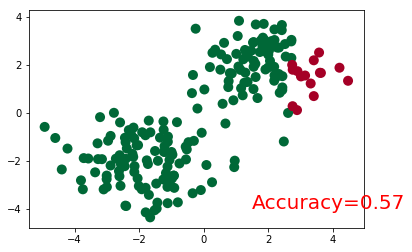

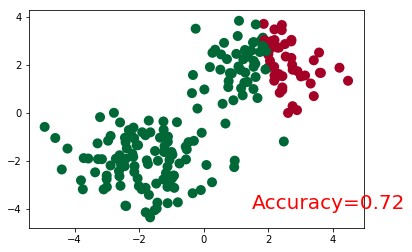

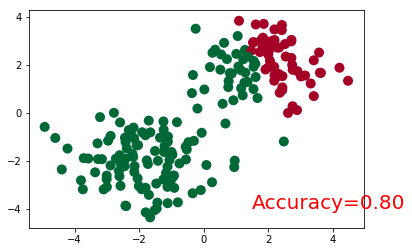

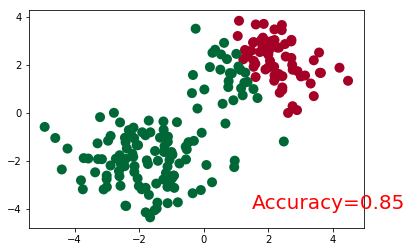

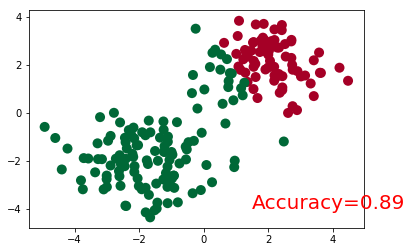

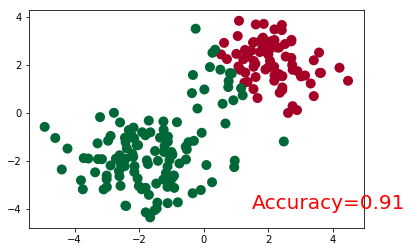

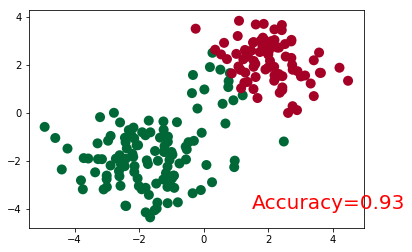

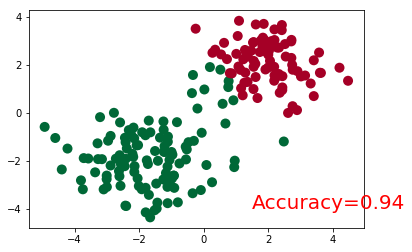

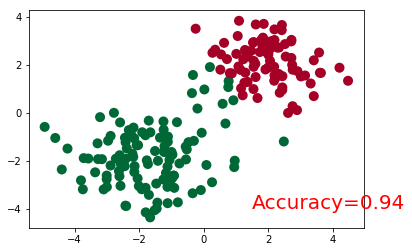

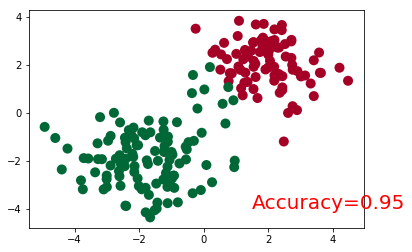

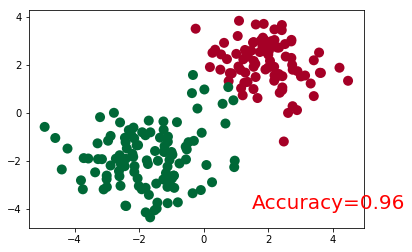

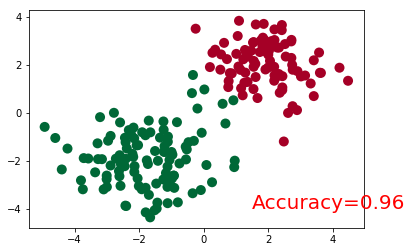

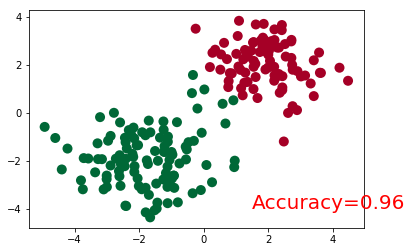

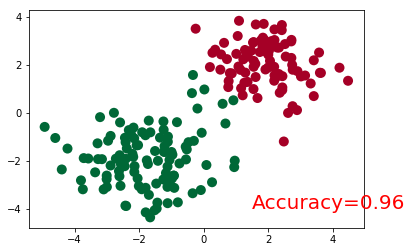

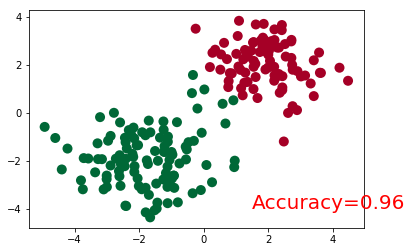

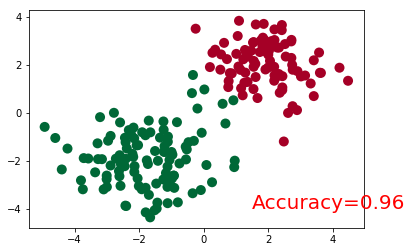

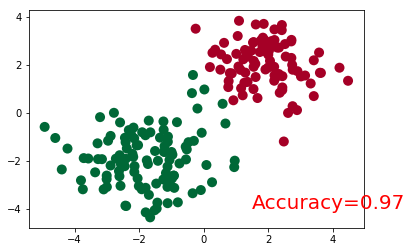

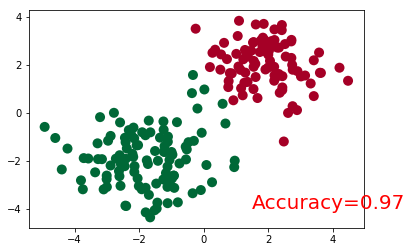

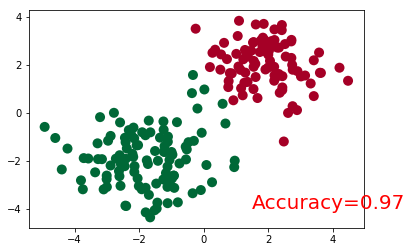

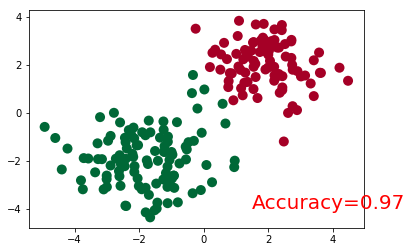

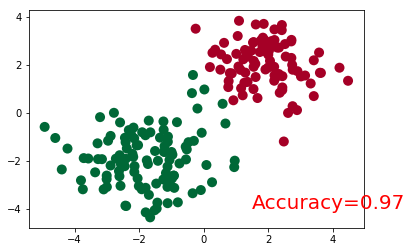

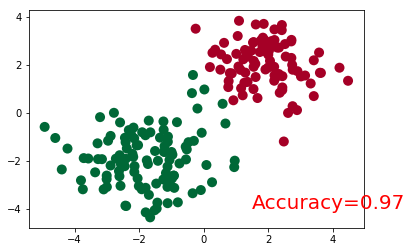

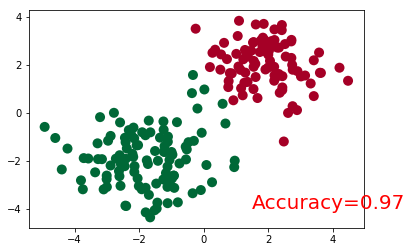

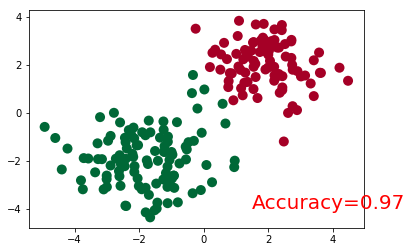

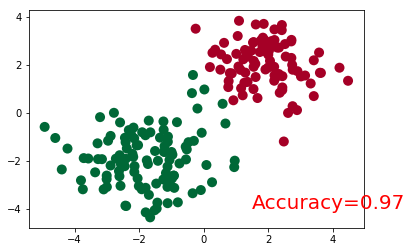

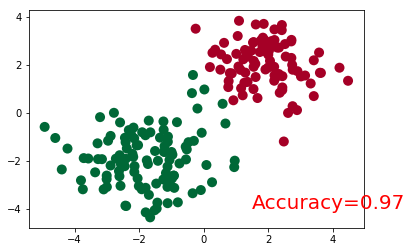

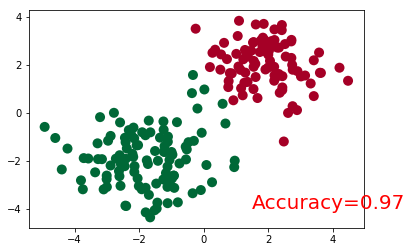

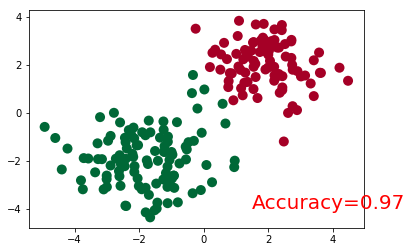

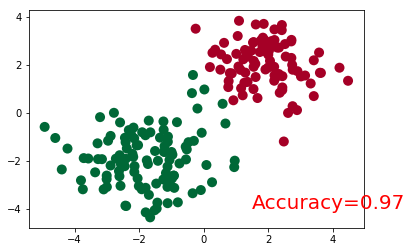

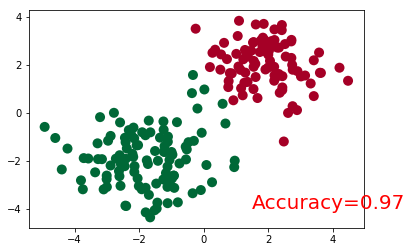

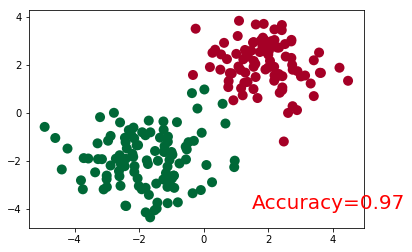

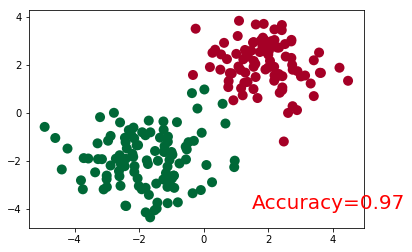

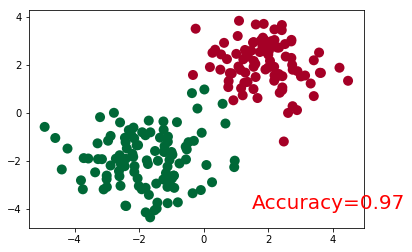

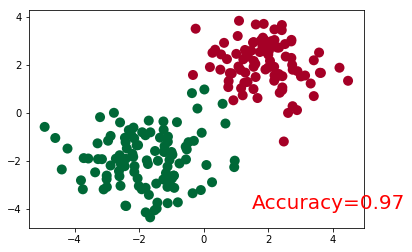

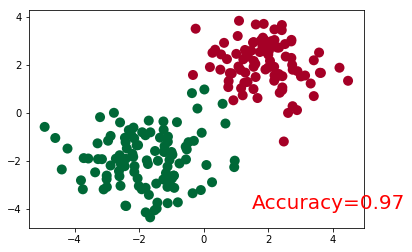

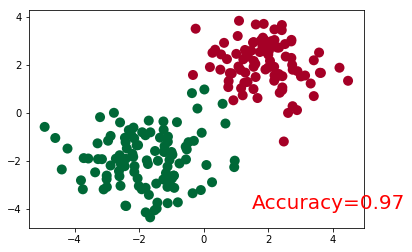

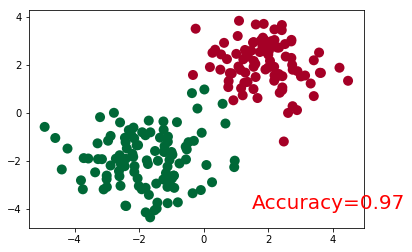

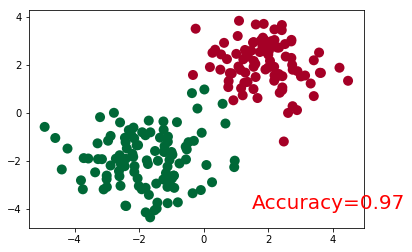

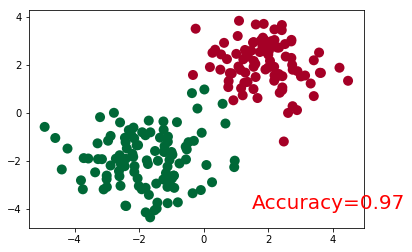

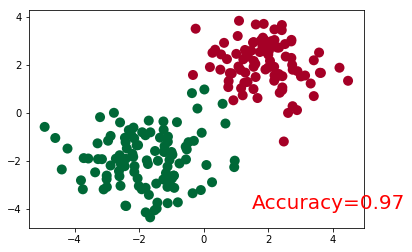

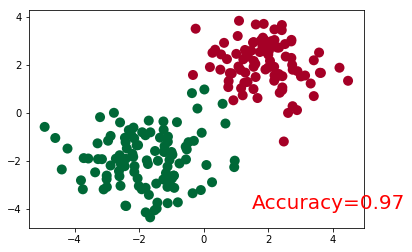

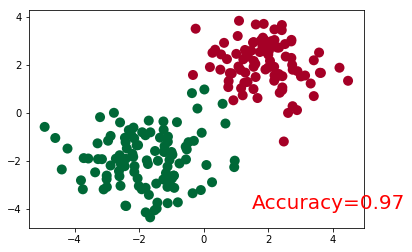

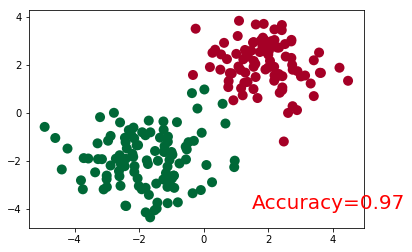

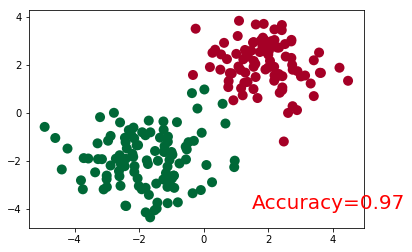

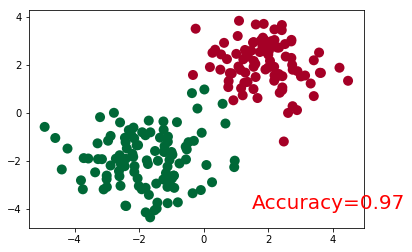

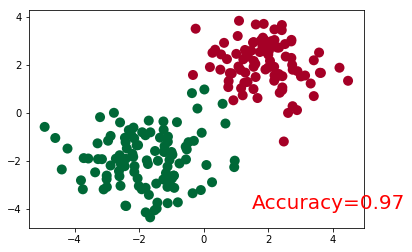

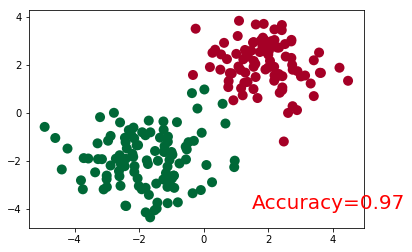

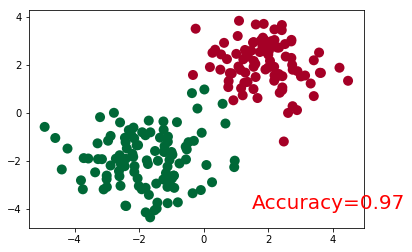

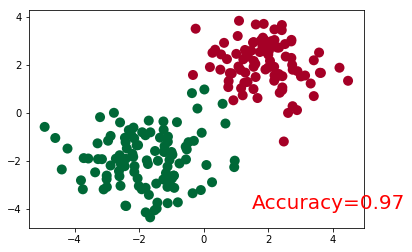

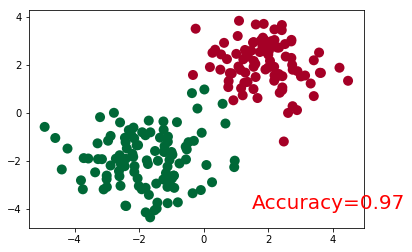

In [11]:
# train
%matplotlib inline
# from IPython import display
optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()

plt.ion()   # 画图
# plt.show()
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(x.data.numpy()[:,0], x.data.numpy()[:, 1] , c=y.data.numpy(), s=50)
# plt.show()


for t in range(100):
    out = net(x)     # 喂给 net 训练数据 x, 输出分析值

    loss = loss_func(out, y)     # 计算两者的误差

    optimizer.zero_grad()   # 清空上一步的残余更新参数值
    loss.backward()         # 误差反向传播, 计算参数更新值
    optimizer.step()        # 将参数更新值施加到 net 的 parameters 上
    if t % 2 == 0:
        plt.cla()
        # 过了一道 softmax 的激励函数后的最大概率才是预测值
        prediction = torch.max(F.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200.  # 预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止画图
plt.show()


## 快速搭建网络

In [ ]:
net2 = torch.nn.Sequential(
    torch.nn.Linear(1, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 1)
)


## 保存网络

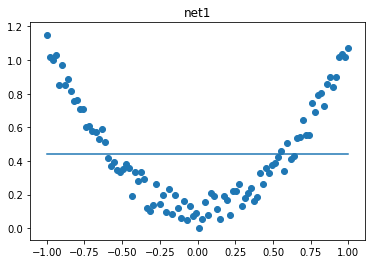

In [29]:
torch.manual_seed(1)    # reproducible

# 假数据
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

def save():
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)      
    )
    
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    
    # train
    for t in range(200):
        pred = net1(x)
        loss = loss_func(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    torch.save(net1, 'net.pkl') # save the whole network
    torch.save(net1.state_dict(),'net_params.pkl')
#     prediction = net1(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), pred.data.numpy())
    plt.title('net1')
    plt.show()
    
save()

In [23]:
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy())
    plt.title('net2')
    plt.show()
    
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy())
    plt.title('net3')
    plt.show()

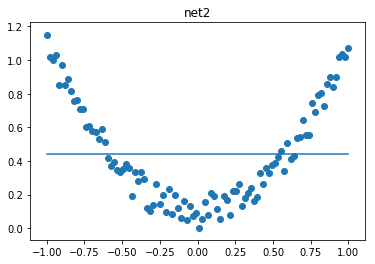

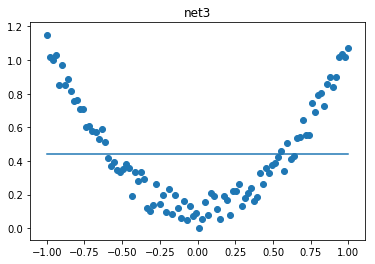

In [24]:

restore_net()

restore_params()